In [10]:
import pandas as pd
from datetime import datetime
import os
import zipfile
import re

In [67]:
def int_to_datetime(value: int) -> datetime:
    """
    TIMESTAMP_START/END -> YYYYMMDDhhmm  (INT)
    """
    chain = str(value)

    year = int(chain[:4])
    month = int(chain[4:6])
    day = int(chain[6:8])

    hour = int(chain[8:10])
    minute = int(chain[10:12])

    dt = datetime(year, month, day, hour, minute)
    return dt


# value = df["TIMESTAMP_START"][0]
# print(value)
# print(int_to_datetime(value))

201012312330
2010-12-31 23:30:00


# Download the data from fluxnet:
#downloadDate:20240402012429
#numberOfSitesDownloaded:35
#emailforSitePIs:Andrew.Ouimette@usda.gov, Baldocchi@berkeley.edu, Sebastien.Gogo@univ-orleans.fr, baldocchi@berkeley.edu, bbergama@usgs.gov, brrunkle@uark.edu, desai@aos.wisc.edu, dyflai@cuhk.edu.hk, eeva-stiina.tuittila@uef.fi, enzo.magliulo@cnr.it, gerald.jurasinski@uni-rostock.de, harazono2009gl@gmail.com, hirano@env.agr.hokudai.ac.jp, hiwata@shinshu-u.ac.jp, janne.rinne@helsinki.fi, lwindham-myers@usgs.gov, mats.b.nilsson@slu.se, michele.reba@ars.usda.gov, miyabi-flux@muh.biglobe.ne.jp, ms-kang@ncam.kr, mstorn@lbl.gov, nina.buchmann@usys.ethz.ch, oliver.sonnentag@umontreal.ca, rcsullivan@anl.gov, rhinkle@ucf.edu, sniu@igsnrr.ac.cn, ted.Schuur@nau.edu, torsten.sachs@gfz-potsdam.de, varlagin@sevin.ru, yryu@snu.ac.kr

# EXAMPLE OF DOWNLOAD LINK (for my account tegoan)
https://ftp.fluxdata.org/.fluxnet_ch4_downloads_72418/META/FLX_AA-Flx_CH4-META_20201112135337801132.csv?=tegoan
#dataFiles
SITE_ID,filename,start_year,end_year,version,filetype,timestamp 
AA-Flx,FLX_AA-Flx_CH4-META_20201112135337801132.csv,,,20201112,META,202011121353
CA-SCB,FLX_CA-SCB_FLUXNET-CH4_DD_2014-2017_1-1.csv,2014,2017,1-1,FLUX-MET,202009151632
CA-SCB,FLX_CA-SCB_FLUXNET-CH4_HH_2014-2017_1-1.csv,2014,2017,1-1,FLUX-MET,202009151632
CH-Dav,FLX_CH-Dav_FLUXNET-CH4_DD_2016-2017_1-1.csv,2016,2017,1-1,FLUX-MET,202009151632
CH-Dav,FLX_CH-Dav_FLUXNET-CH4_HH_2016-2017_1-1.csv,2016,2017,1-1,FLUX-MET,202009151632
CN-Hgu,FLX_CN-Hgu_FLUXNET-CH4_DD_2015-2017_1-1.csv,2015,2017,1-1,FLUX-MET,202009151632
CN-Hgu,FLX_CN-Hgu_FLUXNET-CH4_HH_2015-2017_1-1.csv,2015,2017,1-1,FLUX-MET,202009151632
DE-Dgw,FLX_DE-Dgw_FLUXNET-CH4_DD_2015-2018_1-1.csv,2015,2018,1-1,FLUX-MET,202009151632
DE-Dgw,FLX_DE-Dgw_FLUXNET-CH4_HH_2015-2018_1-1.csv,2015,2018,1-1,FLUX-MET,202009151632
DE-Hte,FLX_DE-Hte_FLUXNET-CH4_DD_2011-2018_1-1.csv,2011,2018,1-1,FLUX-MET,202009151632
DE-Hte,FLX_DE-Hte_FLUXNET-CH4_HH_2011-2018_1-1.csv,2011,2018,1-1,FLUX-MET,202009151632
DE-Zrk,FLX_DE-Zrk_FLUXNET-CH4_DD_2013-2018_1-1.csv,2013,2018,1-1,FLUX-MET,202009151632
DE-Zrk,FLX_DE-Zrk_FLUXNET-CH4_HH_2013-2018_1-1.csv,2013,2018,1-1,FLUX-MET,202009151632
FI-Sii,FLX_FI-Sii_FLUXNET-CH4_DD_2013-2018_1-1.csv,2013,2018,1-1,FLUX-MET,202009151632
FI-Sii,FLX_FI-Sii_FLUXNET-CH4_HH_2013-2018_1-1.csv,2013,2018,1-1,FLUX-MET,202009151632
FR-LGt,FLX_FR-LGt_FLUXNET-CH4_DD_2017-2018_1-1.csv,2017,2018,1-1,FLUX-MET,202009151632
FR-LGt,FLX_FR-LGt_FLUXNET-CH4_HH_2017-2018_1-1.csv,2017,2018,1-1,FLUX-MET,202009151632
HK-MPM,FLX_HK-MPM_FLUXNET-CH4_DD_2016-2018_1-1.csv,2016,2018,1-1,FLUX-MET,202009151632
HK-MPM,FLX_HK-MPM_FLUXNET-CH4_HH_2016-2018_1-1.csv,2016,2018,1-1,FLUX-MET,202009151632
ID-Pag,FLX_ID-Pag_FLUXNET-CH4_DD_2016-2017_1-1.csv,2016,2017,1-1,FLUX-MET,202009151632
ID-Pag,FLX_ID-Pag_FLUXNET-CH4_HH_2016-2017_1-1.csv,2016,2017,1-1,FLUX-MET,202009151632
IT-BCi,FLX_IT-BCi_FLUXNET-CH4_DD_2017-2018_1-1.csv,2017,2018,1-1,FLUX-MET,202009151632
IT-BCi,FLX_IT-BCi_FLUXNET-CH4_HH_2017-2018_1-1.csv,2017,2018,1-1,FLUX-MET,202009151632
JP-BBY,FLX_JP-BBY_FLUXNET-CH4_DD_2015-2018_1-1.csv,2015,2018,1-1,FLUX-MET,202009151632
JP-BBY,FLX_JP-BBY_FLUXNET-CH4_HH_2015-2018_1-1.csv,2015,2018,1-1,FLUX-MET,202009151632
KR-CRK,FLX_KR-CRK_FLUXNET-CH4_DD_2015-2018_1-1.csv,2015,2018,1-1,FLUX-MET,202009151632
KR-CRK,FLX_KR-CRK_FLUXNET-CH4_HH_2015-2018_1-1.csv,2015,2018,1-1,FLUX-MET,202009151632
RU-Fy2,FLX_RU-Fy2_FLUXNET-CH4_DD_2015-2018_1-1.csv,2015,2018,1-1,FLUX-MET,202009151632
RU-Fy2,FLX_RU-Fy2_FLUXNET-CH4_HH_2015-2018_1-1.csv,2015,2018,1-1,FLUX-MET,202009151632
SE-Deg,FLX_SE-Deg_FLUXNET-CH4_DD_2014-2018_1-1.csv,2014,2018,1-1,FLUX-MET,202009151632
SE-Deg,FLX_SE-Deg_FLUXNET-CH4_HH_2014-2018_1-1.csv,2014,2018,1-1,FLUX-MET,202009151632
US-A03,FLX_US-A03_FLUXNET-CH4_DD_2015-2018_1-1.csv,2015,2018,1-1,FLUX-MET,202009151632
US-A03,FLX_US-A03_FLUXNET-CH4_HH_2015-2018_1-1.csv,2015,2018,1-1,FLUX-MET,202009151632
US-A10,FLX_US-A10_FLUXNET-CH4_DD_2012-2018_1-1.csv,2012,2018,1-1,FLUX-MET,202009151632
US-A10,FLX_US-A10_FLUXNET-CH4_HH_2012-2018_1-1.csv,2012,2018,1-1,FLUX-MET,202009151632
US-Bi1,FLX_US-Bi1_FLUXNET-CH4_DD_2016-2018_1-1.csv,2016,2018,1-1,FLUX-MET,202009151632
US-Bi1,FLX_US-Bi1_FLUXNET-CH4_HH_2016-2018_1-1.csv,2016,2018,1-1,FLUX-MET,202009151632
US-Bi2,FLX_US-Bi2_FLUXNET-CH4_DD_2017-2018_1-1.csv,2017,2018,1-1,FLUX-MET,202009151632
US-Bi2,FLX_US-Bi2_FLUXNET-CH4_HH_2017-2018_1-1.csv,2017,2018,1-1,FLUX-MET,202009151632
US-DPW,FLX_US-DPW_FLUXNET-CH4_DD_2013-2017_1-1.csv,2013,2017,1-1,FLUX-MET,202009151632
US-DPW,FLX_US-DPW_FLUXNET-CH4_HH_2013-2017_1-1.csv,2013,2017,1-1,FLUX-MET,202009151632
US-EML,FLX_US-EML_FLUXNET-CH4_DD_2015-2018_1-1.csv,2015,2018,1-1,FLUX-MET,202009151632
US-EML,FLX_US-EML_FLUXNET-CH4_HH_2015-2018_1-1.csv,2015,2018,1-1,FLUX-MET,202009151632
US-Ho1,FLX_US-Ho1_FLUXNET-CH4_DD_2012-2018_1-1.csv,2012,2018,1-1,FLUX-MET,202009151632
US-Ho1,FLX_US-Ho1_FLUXNET-CH4_HH_2012-2018_1-1.csv,2012,2018,1-1,FLUX-MET,202009151632
US-HRA,FLX_US-HRA_FLUXNET-CH4_DD_2017-2017_1-1.csv,2017,2017,1-1,FLUX-MET,202009151632
US-HRA,FLX_US-HRA_FLUXNET-CH4_HH_2017-2017_1-1.csv,2017,2017,1-1,FLUX-MET,202009151632
US-HRC,FLX_US-HRC_FLUXNET-CH4_DD_2017-2017_1-1.csv,2017,2017,1-1,FLUX-MET,202009151632
US-HRC,FLX_US-HRC_FLUXNET-CH4_HH_2017-2017_1-1.csv,2017,2017,1-1,FLUX-MET,202009151632
US-Los,FLX_US-Los_FLUXNET-CH4_DD_2014-2018_1-1.csv,2014,2018,1-1,FLUX-MET,202009151632
US-Los,FLX_US-Los_FLUXNET-CH4_HH_2014-2018_1-1.csv,2014,2018,1-1,FLUX-MET,202009151632
US-Myb,FLX_US-Myb_FLUXNET-CH4_DD_2010-2018_1-1.csv,2010,2018,1-1,FLUX-MET,202009151632
US-Myb,FLX_US-Myb_FLUXNET-CH4_HH_2010-2018_1-1.csv,2010,2018,1-1,FLUX-MET,202009151632
US-NGB,FLX_US-NGB_FLUXNET-CH4_DD_2012-2018_1-1.csv,2012,2018,1-1,FLUX-MET,202009151632
US-NGB,FLX_US-NGB_FLUXNET-CH4_HH_2012-2018_1-1.csv,2012,2018,1-1,FLUX-MET,202009151632
US-NGC,FLX_US-NGC_FLUXNET-CH4_DD_2017-2018_1-1.csv,2017,2018,1-1,FLUX-MET,202009151632
US-NGC,FLX_US-NGC_FLUXNET-CH4_HH_2017-2018_1-1.csv,2017,2018,1-1,FLUX-MET,202009151632
US-PFa,FLX_US-Pfa_FLUXNET-CH4_DD_2010-2018_1-1.csv,2010,2018,1-1,FLUX-MET,202009151632
US-PFa,FLX_US-Pfa_FLUXNET-CH4_HH_2010-2018_1-1.csv,2010,2018,1-1,FLUX-MET,202009151632
US-Sne,FLX_US-Sne_FLUXNET-CH4_DD_2016-2018_1-1.csv,2016,2018,1-1,FLUX-MET,202009151632
US-Sne,FLX_US-Sne_FLUXNET-CH4_HH_2016-2018_1-1.csv,2016,2018,1-1,FLUX-MET,202009151632
US-Srr,FLX_US-Srr_FLUXNET-CH4_DD_2014-2017_1-1.csv,2014,2017,1-1,FLUX-MET,202009151632
US-Srr,FLX_US-Srr_FLUXNET-CH4_HH_2014-2017_1-1.csv,2014,2017,1-1,FLUX-MET,202009151632
US-Tw1,FLX_US-Tw1_FLUXNET-CH4_DD_2011-2018_1-1.csv,2011,2018,1-1,FLUX-MET,202009151632
US-Tw1,FLX_US-Tw1_FLUXNET-CH4_HH_2011-2018_1-1.csv,2011,2018,1-1,FLUX-MET,202009151632
US-Tw4,FLX_US-Tw4_FLUXNET-CH4_DD_2013-2018_1-1.csv,2013,2018,1-1,FLUX-MET,202009151632
US-Tw4,FLX_US-Tw4_FLUXNET-CH4_HH_2013-2018_1-1.csv,2013,2018,1-1,FLUX-MET,202009151632
US-Twt,FLX_US-Twt_FLUXNET-CH4_DD_2009-2017_1-1.csv,2009,2017,1-1,FLUX-MET,202009151632
US-Twt,FLX_US-Twt_FLUXNET-CH4_HH_2009-2017_1-1.csv,2009,2017,1-1,FLUX-MET,202009151632
US-Uaf,FLX_US-Uaf_FLUXNET-CH4_DD_2011-2018_1-1.csv,2011,2018,1-1,FLUX-MET,202009151632
US-Uaf,FLX_US-Uaf_FLUXNET-CH4_HH_2011-2018_1-1.csv,2011,2018,1-1,FLUX-MET,202009151632




In [5]:
# Data processing --------------------------------

""" 
Extract all relevant variables for TS from the stations that have data for 2017.
"""
folder_path = r"../data/raw/FLUXNET_CH4_has_2017_data"

# Load metadata into a separated dataframe
meta_path = folder_path + "/FLX_AA-Flx_CH4-META_20201112135337801132.csv"
meta_df = pd.read_csv(meta_path, header=0)
meta_df

,SITE_ID,SITE_NAME,SITE_PERSONNEL,COUNTRY,LAT,LON,SITE_CLASSIFICATION,UPLAND_CLASS,IGBP,KOPPEN,...,YEAR_START,YEAR_END,UTC_OFFSET,SOIL_TEMP_PROBE_DEPTHS,MOSS_BROWN,MOSS_SPHAGNUM,AERENCHYMATOUS,ERI_SHRUB,TREE,DOM_VEG
0,AT-Neu,Neustift,Georg Wohlfahrt,Austria,47.116670,11.317500,Upland,Alpine meadow,GRA,Dfb,...,2010,2012,1,TS_1 = -0.05cm; TS_2 = -0.1cm; TS_3 = -0.2cm;,0,0,1,0,0,aerenchymatous
1,BR-Npw,Northern Pantanal Wetland,George Vourlitis,Brazil,-16.498000,-56.412000,Swamp,NaN,WSA,Aw,...,2013,2016,-4,NaN,0,0,1,0,1,tree
2,BW-Gum,Guma,Carole Helfter,Botswana,-18.964722,22.371111,Swamp,NaN,WET,Bsh,...,2018,2018,2,NaN,0,0,1,0,1,aerenchymatous
3,BW-Nxr,Nxaraga,Carole Helfter,Botswana,-19.548056,23.179167,Swamp,NaN,GRA,Bsh,...,2018,2018,2,NaN,0,0,1,0,1,aerenchymatous
4,CA-SCB,Scotty Creek Bog,"Oliver Sonnentag, Manuel Helbig",Canada,61.308900,-121.298400,Bog,NaN,WET,Dfc,...,2014,2017,-7,TS_1 = 0cm; TS_2 = -0.02cm; TS_3 = -0.04cm; TS...,0,1,1,1,0,moss_sphagnum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,US-Tw4,Twitchell East End Wetland,Dennis Baldocchi,USA,38.102744,-121.641329,Marsh,NaN,WET,Csa,...,2013,2018,-8,TS_1 = -0.02cm; TS_2 = -0.04cm; TS_3 = -0.08cm...,0,0,1,0,0,aerenchymatous
77,US-Tw5,East Pond Wetland,Dennis Baldocchi,USA,38.107192,-121.642576,Marsh,NaN,WET,Csa,...,2018,2018,-8,TS_1 = -0.02cm; TS_2 = -0.1cm; TS_3 = -0.02cm;...,0,0,1,0,0,aerenchymatous
78,US-Twt,Twitchell Island,Dennis Baldocchi,USA,38.108720,-121.653100,Rice,NaN,CRO,Csa,...,2009,2017,-8,TS_1 = -0.02cm; TS_2 = -0.04cm; TS_3 = -0.08cm...,0,0,1,0,0,aerenchymatous
79,US-Uaf,"University of Alaska, Fairbanks",Masahito Ueyama,USA,64.866270,-147.855530,Bog,NaN,ENF,Dwc,...,2011,2018,-9,TS_1 = -0.09cm; TS_2 = -0.183cm; TS_3 = -0.283...,1,1,1,1,1,moss_sphagnum


In [ ]:
# Files are compressed in a  zip that has a folder and two .csv, one for half hour measures and other for daily, we want HH data.

""" 
Open the folder, list every zip file in it

save the name of the station

'FLX_<name>_FLUXNET[...].zip'

Open only the .csv file with _HH_ in the name, load it into a dataframe and select the data.

Finally, append it to a list of dataframes

"""

In [46]:
import re
import zipfile
import pandas as pd

df_list = {}


def int_to_datetime(value: int) -> datetime:
    """
    TIMESTAMP_START/END -> YYYYMMDDhhmm  (INT)
    """
    chain = str(value)

    year = int(chain[:4])
    month = int(chain[4:6])
    day = int(chain[6:8])

    hour = int(chain[8:10])
    minute = int(chain[10:12])

    dt = datetime(year, month, day, hour, minute)
    return dt


def processing_df(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # Select fot the relevant data:
    cols_to_keep = [
        "TIMESTAMP_START",
        "TIMESTAMP_END",
        "TS_1",
        "TS_2",
        "TS_3",
        "TS_4",
        "TS_5",
        "TS_6",
        "TS_7",
        "TS_8",
        # METADATA: SOIL_TEMP_PROBE_DEPTHS: Installed depth of soil temperature probe (cm, negative values indicate below the surface)
        "WTD",
        "TA",
    ]

    df = df[[col for col in cols_to_keep if col in df.columns]]

    # Turn timestamps into datetime,
    df.loc[:, "DATETIME_START"] = df.loc[:, "TIMESTAMP_START"].apply(
        lambda x: int_to_datetime(x)
    )
    df.loc[:, "DATETIME_END"] = df.loc[:, "TIMESTAMP_END"].apply(
        lambda x: int_to_datetime(x)
    )

    df.drop(columns=["TIMESTAMP_START", "TIMESTAMP_END"])

    # Filter the data to contain only 2017 datapoints
    start_date = datetime(2017, 1, 1)
    end_date = datetime(2017, 12, 31, 23, 59, 59)

    filter = df.loc[:, "DATETIME_START"].apply(lambda x: start_date <= x <= end_date)
    df = df.loc[filter, :]

    return df


def process_zip_file(zip_file_path):
    with zipfile.ZipFile(zip_file_path) as zip_file:
        for file_info in zip_file.infolist():

            if file_info.filename.endswith(".csv") and re.findall(
                "_HH_", file_info.filename
            ):
                # Save the name of the station:
                station = re.findall("FLX_(.{2}-.{3})_", file_info.filename)[0]

                with zip_file.open(file_info.filename) as csv_file:
                    df = pd.read_csv(csv_file)

                    # Process the data further:
                    df = processing_df(df)

                    # Add to the dictionary
                    df_list[station] = df


def process_files_in_folder(folder_path):
    for filename in os.listdir(folder_path):

        if filename.endswith(".zip"):
            print("Processing:", filename)

            zip_file_path = os.path.join(folder_path, filename)
            process_zip_file(zip_file_path)

In [47]:
folder_path = r"../data/raw/FLUXNET_CH4_has_2017_data"
process_files_in_folder(folder_path)

Processing: FLX_CA-SCB_FLUXNET-CH4_2014-2017_1-1.zip
Processing: FLX_CH-Dav_FLUXNET-CH4_2016-2017_1-1.zip
Processing: FLX_CN-Hgu_FLUXNET-CH4_2015-2017_1-1.zip
Processing: FLX_DE-Dgw_FLUXNET-CH4_2015-2018_1-1.zip
Processing: FLX_DE-Hte_FLUXNET-CH4_2011-2018_1-1.zip
Processing: FLX_DE-Zrk_FLUXNET-CH4_2013-2018_1-1.zip
Processing: FLX_FI-Sii_FLUXNET-CH4_2013-2018_1-1.zip
Processing: FLX_FR-LGt_FLUXNET-CH4_2017-2018_1-1.zip
Processing: FLX_HK-MPM_FLUXNET-CH4_2016-2018_1-1.zip
Processing: FLX_ID-Pag_FLUXNET-CH4_2016-2017_1-1.zip
Processing: FLX_IT-BCi_FLUXNET-CH4_2017-2018_1-1.zip
Processing: FLX_JP-BBY_FLUXNET-CH4_2015-2018_1-1.zip
Processing: FLX_KR-CRK_FLUXNET-CH4_2015-2018_1-1.zip
Processing: FLX_RU-Fy2_FLUXNET-CH4_2015-2018_1-1.zip
Processing: FLX_SE-Deg_FLUXNET-CH4_2014-2018_1-1.zip
Processing: FLX_US-A03_FLUXNET-CH4_2015-2018_1-1.zip
Processing: FLX_US-A10_FLUXNET-CH4_2012-2018_1-1.zip
Processing: FLX_US-Bi1_FLUXNET-CH4_2016-2018_1-1.zip
Processing: FLX_US-Bi2_FLUXNET-CH4_2017-2018_1

In [54]:
station = [k for k in df_list.keys()][0]
print(station)
df = df_list[station]
import numpy as np

# replace missing values with nans
df.replace(-9999.0, np.nan, inplace=True)
df

CA-SCB


,TIMESTAMP_START,TIMESTAMP_END,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,WTD,TA,DATETIME_START,DATETIME_END
52608,201701010000,201701010030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,2017-01-01 00:30:00
52609,201701010030,201701010100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:30:00,2017-01-01 01:00:00
52610,201701010100,201701010130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 01:00:00,2017-01-01 01:30:00
52611,201701010130,201701010200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 01:30:00,2017-01-01 02:00:00
52612,201701010200,201701010230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 02:00:00,2017-01-01 02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68010,201711172100,201711172130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-17 21:00:00,2017-11-17 21:30:00
68011,201711172130,201711172200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-17 21:30:00,2017-11-17 22:00:00
68012,201711172200,201711172230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-17 22:00:00,2017-11-17 22:30:00
68013,201711172230,201711172300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-17 22:30:00,2017-11-17 23:00:00


C:\Users\andre\AppData\Local\Temp\ipykernel_4756\2155888412.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


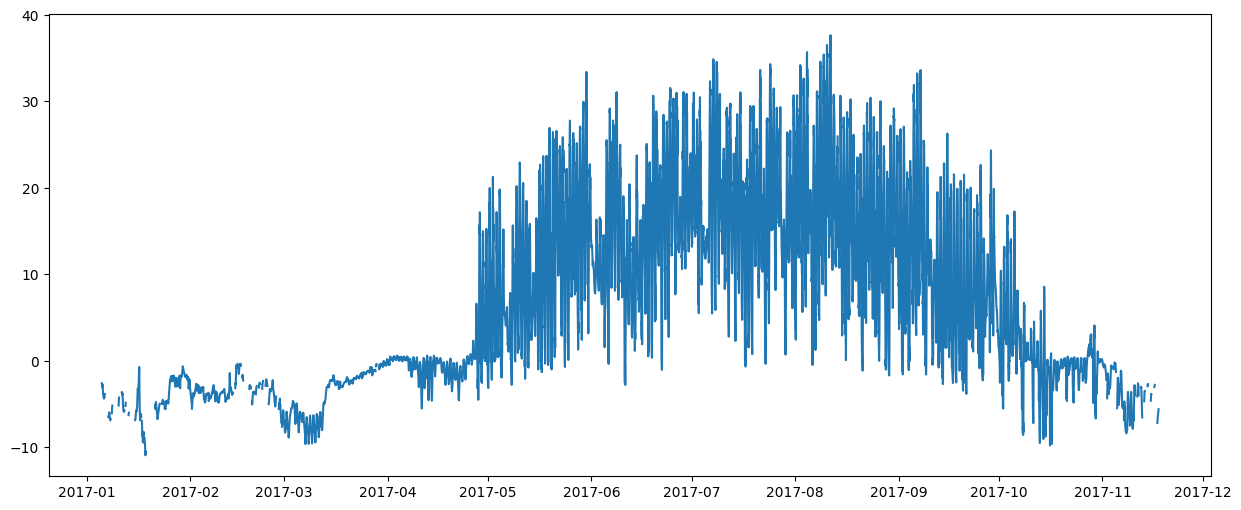

In [77]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.plot(df["DATETIME_START"], df["TS_1"])
# ax.plot(df["DATETIME_START"], df["TS_2"])
# ax.plot(df["DATETIME_START"], df["TS_3"])

fig.show()

In [61]:
# Plot the locations into a wolrdmap:

lat, lon = meta_df["LAT"], meta_df["LON"]

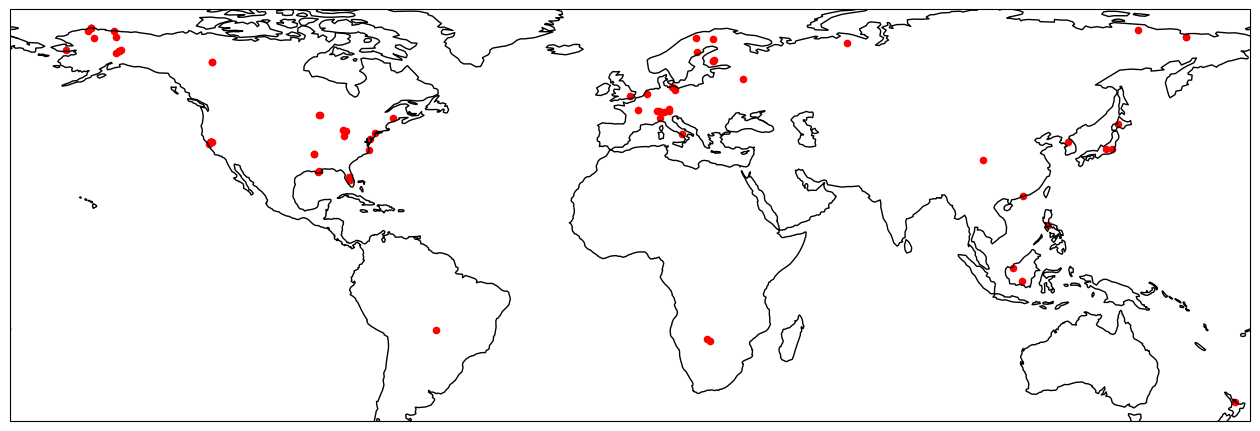

C:\Users\andre\AppData\Local\Temp\ipykernel_4756\922136071.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [69]:
import cartopy.crs as ccrs

# plot available station on a map
fig, ax = plt.subplots(
    1, 1, figsize=(16, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)

ax.scatter(lon, lat, transform=ccrs.PlateCarree(), color="red", marker="o", s=20)

# Add coastlines for better visualization
ax.coastlines()

plt.show()

fig.show()

In [70]:
# METADATA FLAGS related to vegetation:
# https://fluxnet.org/data/fluxnet-ch4-community-product/

""" 
MOSS_BROWN: presence or absence (1 or 0) of brown mosses on the site
MOSS_SPHAGNUM: presence or absence (1 or 0) of Sphagnum mosses on the site
AERENCHYMATOUS: presence or absence (1 or 0) of species that have aerenchyma (mostly Order Poales but includes exceptions)
ERI_SHRUB: presence or absence (1 or 0) of ericaceous shrubs on the site
TREE: presence or absence (1 or 0) of trees (of any height) on the site

DOM_VEG: Dominant plant functional type in the tower footprint. Lead site investigators had to pick one from the following options: moss_brown, moss_sphagnum, aerenchymatous, eri_shrub or tree
"""

meta_df.columns

Index(['SITE_ID', 'SITE_NAME', 'SITE_PERSONNEL', 'COUNTRY', 'LAT', 'LON',
       'SITE_CLASSIFICATION', 'UPLAND_CLASS', 'IGBP', 'KOPPEN',
       'ORIGINAL_DATA_SOURCE', 'FLUXNET-CH4_DATA_POLICY', 'YEAR_START',
       'YEAR_END', 'UTC_OFFSET', 'SOIL_TEMP_PROBE_DEPTHS', 'MOSS_BROWN',
       'MOSS_SPHAGNUM', 'AERENCHYMATOUS', 'ERI_SHRUB', 'TREE', 'DOM_VEG'],
      dtype='object')

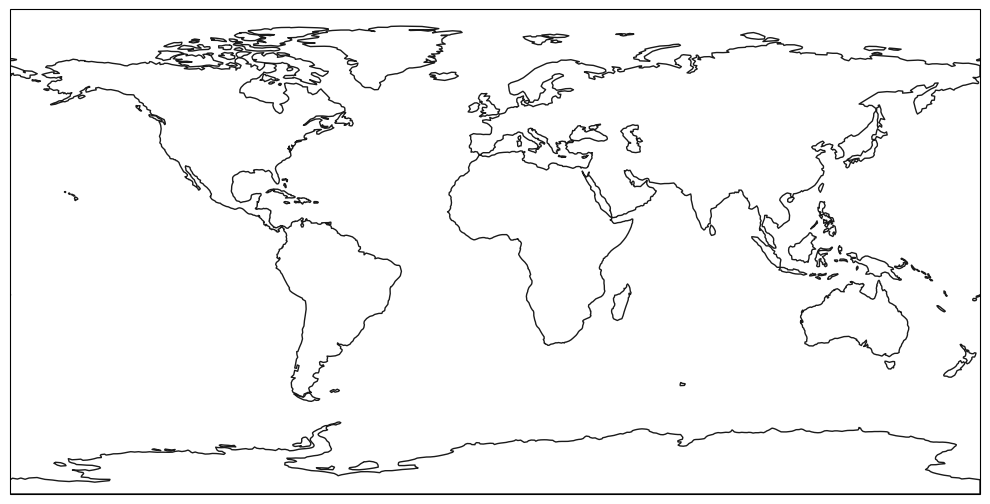